<a href="https://colab.research.google.com/github/joaogabrielanuto/Analise-Tecnica/blob/main/CANDLESTICKS_analise_for%C3%A7a_candlesticks_ibov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Classificação de Força dos Candlesticks**

---

### **1. Libs necessárias**

In [1]:
!pip install yfinance --quiet
!pip install mplfinance --quiet

In [41]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mplfinance as mpf
import seaborn as sns

### **2. Obtenção dos dados do ativo**

In [109]:
df = yf.download('^BVSP', start='2000-01-01', auto_adjust='False')

[*********************100%***********************]  1 of 1 completed


## **3. Criação indicadores**

In [108]:
df_ohlc = df.copy()
df_ohlc['tam_corpo_candle'] = abs(df_ohlc['Close'] - df_ohlc['Open'])
df_ohlc['media_tam_corpo_candle'] = df_ohlc['tam_corpo_candle'].rolling(200).mean()
df_ohlc.tail(5)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume,tam_corpo_candle,media_tam_corpo_candle
Date,,,,,,,
2023-06-16,119208.0,119555.0,118487.0,118758.0,15251700,450.0,1175.845
2023-06-19,118757.0,119939.0,118558.0,119858.0,6776300,1101.0,1175.180
2023-06-20,119858.0,119858.0,118416.0,119622.0,10924200,236.0,1176.225
2023-06-21,119623.0,120519.0,119332.0,120420.0,11736700,797.0,1170.750
2023-06-22,120420.0,120420.0,118018.0,118934.0,11831500,1486.0,1173.640


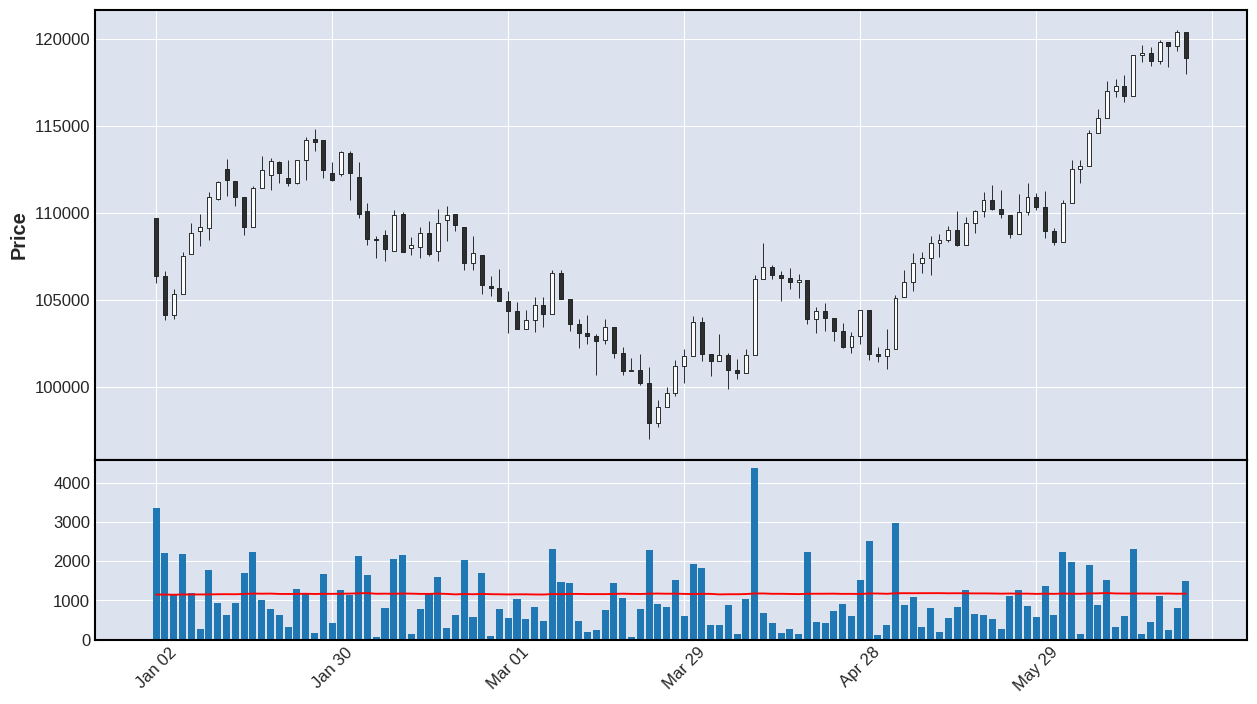

In [60]:
plot_candle = df_ohlc.loc['2023-01-01':]
plot_tam_candle = mpf.make_addplot(plot_candle['tam_corpo_candle'], panel=1, type='bar')
plot_media_tam_candle = mpf.make_addplot(plot_candle['media_tam_corpo_candle'], panel=1, color='red')

mpf.plot(plot_candle, type='candle', figsize=(16,9), addplot=[plot_tam_candle, plot_media_tam_candle])

In [61]:
df_ohlc['cond_media'] = df_ohlc['tam_corpo_candle'] > df_ohlc['media_tam_corpo_candle']
df_ohlc['razao_corpo'] = abs(df_ohlc['Close'] - df_ohlc['Open']) / abs(df_ohlc['High'] - df_ohlc['Low'])
df_ohlc.tail(10)

,Open,High,Low,Close,Volume,tam_corpo_candle,media_tam_corpo_candle,cond_media,razao_corpo
Date,,,,,,,,,
2023-06-09,115489.0,117603.0,115489.0,117019.0,13527100,1530.0,1188.340,True,0.723746
2023-06-12,117022.0,117735.0,116704.0,117336.0,12016200,314.0,1178.355,False,0.304559
2023-06-13,117337.0,117924.0,116363.0,116743.0,12392200,594.0,1176.395,False,0.380525
2023-06-14,116753.0,119085.0,116745.0,119069.0,16938600,2316.0,1176.210,True,0.989744
2023-06-15,119068.0,119686.0,118693.0,119221.0,12298000,153.0,1176.765,False,0.154079
2023-06-16,119208.0,119555.0,118487.0,118758.0,15251700,450.0,1175.845,False,0.421348
2023-06-19,118757.0,119939.0,118558.0,119858.0,6776300,1101.0,1175.180,False,0.797248
2023-06-20,119858.0,119858.0,118416.0,119622.0,10924200,236.0,1176.225,False,0.163662
2023-06-21,119623.0,120519.0,119332.0,120420.0,11736700,797.0,1170.750,False,0.671441


In [ ]:
#inicia a coluna para nao dar erro no for
df_ohlc['forca_candle'] = np.nan

#itera as linhas para classificar o candle
for i in range(len(df_ohlc)):

    open = df_ohlc['Open'].iloc[i]
    high = df_ohlc['High'].iloc[i]
    low = df_ohlc['Low'].iloc[i]
    close = df_ohlc['Close'].iloc[i]
    cond_media = df_ohlc['cond_media'].iloc[i]
    razao_corpo = df_ohlc['razao_corpo'].iloc[i]

    if (cond_media == True) and (razao_corpo >= 0.80):
        df_ohlc['forca_candle'].iloc[i] = 'forte'

    elif (cond_media == True) and (0.50 <= razao_corpo < 0.79):
        df_ohlc['forca_candle'].iloc[i] = 'moderado'

    else:
        df_ohlc['forca_candle'].iloc[i] = 'fraco'

In [105]:
df_ohlc.tail(10)

,Open,High,Low,Close,Volume,tam_corpo_candle,media_tam_corpo_candle,cond_media,razao_corpo,forca_candle
Date,,,,,,,,,,
2023-06-09,115489.0,117603.0,115489.0,117019.0,13527100,1530.0,1188.340,True,0.723746,moderado
2023-06-12,117022.0,117735.0,116704.0,117336.0,12016200,314.0,1178.355,False,0.304559,fraco
2023-06-13,117337.0,117924.0,116363.0,116743.0,12392200,594.0,1176.395,False,0.380525,fraco
2023-06-14,116753.0,119085.0,116745.0,119069.0,16938600,2316.0,1176.210,True,0.989744,forte
2023-06-15,119068.0,119686.0,118693.0,119221.0,12298000,153.0,1176.765,False,0.154079,fraco
2023-06-16,119208.0,119555.0,118487.0,118758.0,15251700,450.0,1175.845,False,0.421348,fraco
2023-06-19,118757.0,119939.0,118558.0,119858.0,6776300,1101.0,1175.180,False,0.797248,fraco
2023-06-20,119858.0,119858.0,118416.0,119622.0,10924200,236.0,1176.225,False,0.163662,fraco
2023-06-21,119623.0,120519.0,119332.0,120420.0,11736700,797.0,1170.750,False,0.671441,fraco


In [106]:
forca_counts = df_ohlc['forca_candle'].value_counts()
forca_counts

fraco       3659
forte       1232
moderado     919
Name: forca_candle, dtype: int64

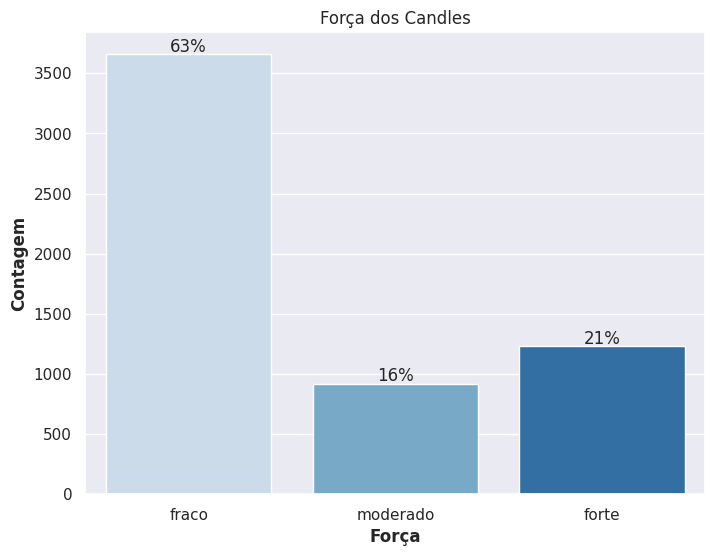

In [107]:
# Configurações do estilo do Seaborn
sns.set(style='darkgrid')


# Criação do gráfico de barras
plt.figure(figsize=(8, 6))  # Configura o tamanho da figura
ax = sns.barplot(x=forca_counts.index,
            y=forca_counts.values,
            order=['fraco', 'moderado', 'forte'],
            palette='Blues')

# definir percentuais
percentage = [forca_counts['fraco'] / forca_counts.sum() * 100,
              forca_counts['moderado'] / forca_counts.sum() * 100,
              forca_counts['forte'] / forca_counts.sum() * 100]

# adiciona percentuais nas barras
patches = ax.patches
for i in range(len(patches)):
   x = patches[i].get_x() + patches[i].get_width()/2
   y = patches[i].get_height() + 20
   ax.annotate('{:.0f}%'.format(percentage[i]), (x, y), ha='center')

# Adiciona rótulos
plt.xlabel('Força')
plt.ylabel('Contagem')

# Adiciona título ao gráfico
plt.title('Força dos Candles')

# Exibe o gráfico
plt.show()

# Lixo

In [18]:
def forca_candle(open, high, low, close, cond_media, razao_corpo):
    cond_forte = (cond_media == True) & (razao_corpo >= 0.80)
    cond_moderada = (cond_media == True) & (0.50 <= razao_corpo <= 0.79)

    if cond_forte == True:
        forca = "forte"
    elif cond_moderada == True:
        forca = "moderado"
    else:
        forca = "fraco"
    return(forca)



In [19]:
df_ohlc['forca_candle'] = forca_candle

In [20]:
df_ohlc

,Open,High,Low,Close,Volume,tam_corpo_candle,media_tam_corpo_candle,cond_media,razao_corpo,forca_candle
Date,,,,,,,,,,
2000-01-03,17098.0,17408.0,16719.0,16930.0,0,168.0,NaN,False,0.243832,<function forca_candle at 0x7fd9ce40c820>
2000-01-04,16908.0,16908.0,15851.0,15851.0,0,1057.0,NaN,False,1.000000,<function forca_candle at 0x7fd9ce40c820>
2000-01-05,15871.0,16302.0,15350.0,16245.0,0,374.0,NaN,False,0.392857,<function forca_candle at 0x7fd9ce40c820>
2000-01-06,16237.0,16499.0,15977.0,16107.0,0,130.0,NaN,False,0.249042,<function forca_candle at 0x7fd9ce40c820>
2000-01-07,16125.0,16449.0,16125.0,16309.0,0,184.0,NaN,False,0.567901,<function forca_candle at 0x7fd9ce40c820>
...,...,...,...,...,...,...,...,...,...,...
2023-06-16,119208.0,119555.0,118487.0,118758.0,15251700,450.0,1175.845,False,0.421348,<function forca_candle at 0x7fd9ce40c820>
2023-06-19,118757.0,119939.0,118558.0,119858.0,6776300,1101.0,1175.180,False,0.797248,<function forca_candle at 0x7fd9ce40c820>
2023-06-20,119858.0,119858.0,118416.0,119622.0,10924200,236.0,1176.225,False,0.163662,<function forca_candle at 0x7fd9ce40c820>
